<a href="https://colab.research.google.com/github/tiot07/Mailsploit/blob/master/bluebacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
ターゲット
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
ディープラーニングによる予測
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
正解率
100.0


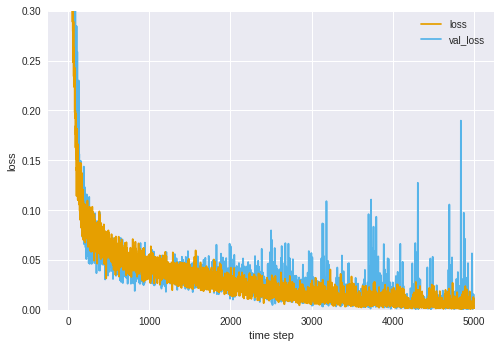

In [0]:
# -*- coding: utf-8 -*-
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import sys

# 学習結果を保存するファイルの決定
if len(sys.argv)==1:
    print('使用法: python ml-10-01-iris-deep-learn.py 保存ファイル名.h5')
    sys.exit()
savefile = sys.argv[1]

# アヤメのデータをロードし、変数irisに格納
iris = datasets.load_iris()

# 特徴量のセットを変数Xに、ターゲットを変数yに格納
X = iris.data
y = iris.target

# サンプル数、特徴量の次元、クラス数の取り出し
(n_samples, n_features) = X.shape
n_classes = len(np.unique(y))

# ターゲットyをkeras用の形式に変換
y_keras = keras.utils.to_categorical(y, n_classes)

# 4層ニューラルネットワークを定義
model = Sequential()
# 中間層1（ニューロン100個）と入力層を定義
model.add(Dense(units=100, activation='relu', input_shape=(n_features,)))
# Dropout層を定義
model.add(Dropout(0.1))
# 中間層2（ニューロン64個）を定義
model.add(Dense(units=64, activation='relu'))
# Dropout層を定義
model.add(Dropout(0.1))
# 出力層を定義（ニューロン数はクラス数に等しい3個）
model.add(Dense(units=n_classes, activation='softmax'))

# モデルのコンパイル
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# モデルの学習 verboseが2だと過程が表示される
history = model.fit(X, y_keras, epochs=5000, validation_split=0.1, batch_size=n_samples, verbose=0)

# 結果の表示
result = model.predict_classes(X, verbose=0)

print('ターゲット')
print(y)
print('ディープラーニングによる予測')
print(result)

# データ数をtotalに格納
total = len(X)
# ターゲット（正解）と予測が一致した数をsuccessに格納
success = sum(result==y)

# 正解率をパーセント表示
print('正解率')
print(100.0*success/total)

# 学習結果を保存
model.save(savefile)
# 損失関数のグラフの軸ラベルを設定
plt.xlabel('time step')
plt.ylabel('loss')

# グラフ縦軸の範囲を0以上と定める
plt.ylim(0, max(np.r_[history.history['val_loss'], history.history['loss']]))

# 損失関数の時間変化を描画
val_loss, = plt.plot(history.history['val_loss'], c='#56B4E9')
loss, = plt.plot(history.history['loss'], c='#E69F00')

# グラフの凡例（はんれい）を追加
plt.legend([loss, val_loss], ['loss', 'val_loss'])

# 描画したグラフを表示
plt.ylim([0,0.3])
plt.show()




ターゲット
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
ディープラーニングによる予測
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
正解率
98.66666666666667


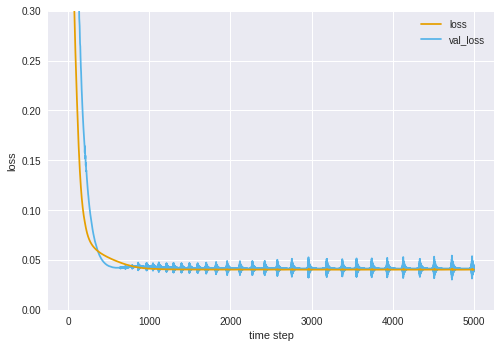

In [0]:
# -*- coding: utf-8 -*-
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import sys

# 学習結果を保存するファイルの決定
if len(sys.argv)==1:
    print('使用法: python ml-10-01-iris-deep-learn.py 保存ファイル名.h5')
    sys.exit()
savefile = sys.argv[1]

# アヤメのデータをロードし、変数irisに格納
iris = datasets.load_iris()

# 特徴量のセットを変数Xに、ターゲットを変数yに格納
X = iris.data
y = iris.target

# サンプル数、特徴量の次元、クラス数の取り出し
(n_samples, n_features) = X.shape
n_classes = len(np.unique(y))

# ターゲットyをkeras用の形式に変換
y_keras = keras.utils.to_categorical(y, n_classes)

# 4層ニューラルネットワークを定義
model = Sequential()
# 中間層1（ニューロン100個）と入力層を定義
model.add(Dense(units=100, activation='relu', input_shape=(n_features,)))
# Dropout層を定義
#model.add(Dropout(0.1))
# 中間層2（ニューロン64個）を定義
model.add(Dense(units=64, activation='relu'))
# Dropout層を定義
#model.add(Dropout(0.1))
# 出力層を定義（ニューロン数はクラス数に等しい3個）
model.add(Dense(units=n_classes, activation='softmax'))

# モデルのコンパイル
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# モデルの学習 verboseが2だと過程が表示される
history = model.fit(X, y_keras, epochs=5000, validation_split=0.1, batch_size=n_samples, verbose=0)

# 結果の表示
result = model.predict_classes(X, verbose=0)

print('ターゲット')
print(y)
print('ディープラーニングによる予測')
print(result)

# データ数をtotalに格納
total = len(X)
# ターゲット（正解）と予測が一致した数をsuccessに格納
success = sum(result==y)

# 正解率をパーセント表示
print('正解率')
print(100.0*success/total)

# 学習結果を保存
model.save(savefile)
# 損失関数のグラフの軸ラベルを設定
plt.xlabel('time step')
plt.ylabel('loss')

# グラフ縦軸の範囲を0以上と定める
plt.ylim(0, max(np.r_[history.history['val_loss'], history.history['loss']]))

# 損失関数の時間変化を描画
val_loss, = plt.plot(history.history['val_loss'], c='#56B4E9')
loss, = plt.plot(history.history['loss'], c='#E69F00')

# グラフの凡例（はんれい）を追加
plt.legend([loss, val_loss], ['loss', 'val_loss'])

# 描画したグラフを表示
plt.ylim([0,0.3])
plt.show()




ターゲット
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
ディープラーニングによる予測
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
正解率
100.0


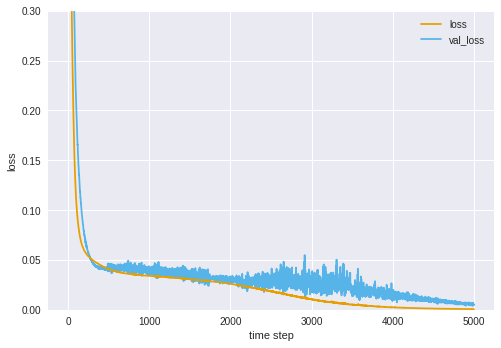

In [0]:
# -*- coding: utf-8 -*-
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import sys

# 学習結果を保存するファイルの決定
if len(sys.argv)==1:
    print('使用法: python ml-10-01-iris-deep-learn.py 保存ファイル名.h5')
    sys.exit()
savefile = sys.argv[1]

# アヤメのデータをロードし、変数irisに格納
iris = datasets.load_iris()

# 特徴量のセットを変数Xに、ターゲットを変数yに格納
X = iris.data
y = iris.target

# サンプル数、特徴量の次元、クラス数の取り出し
(n_samples, n_features) = X.shape
n_classes = len(np.unique(y))

# ターゲットyをkeras用の形式に変換
y_keras = keras.utils.to_categorical(y, n_classes)

# 4層ニューラルネットワークを定義
model = Sequential()
# 中間層1（ニューロン100個）と入力層を定義
model.add(Dense(units=100, activation='relu', input_shape=(n_features,)))
# Dropout層を定義
#model.add(Dropout(0.1))
# 中間層2（ニューロン64個）を定義
model.add(Dense(units=64, activation='relu', input_shape=(n_features,)))
# Dropout層を定義
#model.add(Dropout(0.1))
# 出力層を定義（ニューロン数はクラス数に等しい3個）
model.add(Dense(units=n_classes, activation='softmax'))

# モデルのコンパイル
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# モデルの学習 verboseが2だと過程が表示される
history = model.fit(X, y_keras, epochs=5000, validation_split=0.1, batch_size=n_samples, verbose=0)

# 結果の表示
result = model.predict_classes(X, verbose=0)

print('ターゲット')
print(y)
print('ディープラーニングによる予測')
print(result)

# データ数をtotalに格納
total = len(X)
# ターゲット（正解）と予測が一致した数をsuccessに格納
success = sum(result==y)

# 正解率をパーセント表示
print('正解率')
print(100.0*success/total)

# 学習結果を保存
model.save(savefile)
# 損失関数のグラフの軸ラベルを設定
plt.xlabel('time step')
plt.ylabel('loss')

# グラフ縦軸の範囲を0以上と定める
plt.ylim(0, max(np.r_[history.history['val_loss'], history.history['loss']]))

# 損失関数の時間変化を描画
val_loss, = plt.plot(history.history['val_loss'], c='#56B4E9')
loss, = plt.plot(history.history['loss'], c='#E69F00')

# グラフの凡例（はんれい）を追加
plt.legend([loss, val_loss], ['loss', 'val_loss'])

# 描画したグラフを表示
plt.ylim([0,0.3])
plt.show()




ターゲット
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
ディープラーニングによる予測
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
正解率
100.0


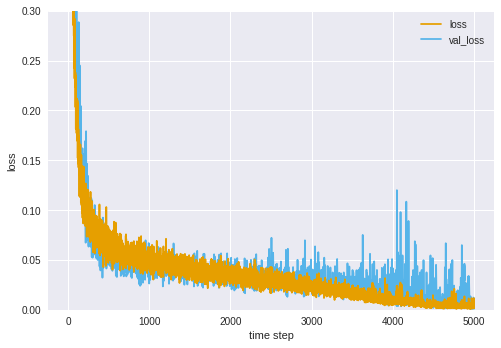

In [0]:
# -*- coding: utf-8 -*-
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import sys

# 学習結果を保存するファイルの決定
if len(sys.argv)==1:
    print('使用法: python ml-10-01-iris-deep-learn.py 保存ファイル名.h5')
    sys.exit()
savefile = sys.argv[1]

# アヤメのデータをロードし、変数irisに格納
iris = datasets.load_iris()

# 特徴量のセットを変数Xに、ターゲットを変数yに格納
X = iris.data
y = iris.target

# サンプル数、特徴量の次元、クラス数の取り出し
(n_samples, n_features) = X.shape
n_classes = len(np.unique(y))

# ターゲットyをkeras用の形式に変換
y_keras = keras.utils.to_categorical(y, n_classes)

# 4層ニューラルネットワークを定義
model = Sequential()
# 中間層1（ニューロン100個）と入力層を定義
model.add(Dense(units=100, activation='relu', input_shape=(n_features,)))
# Dropout層を定義
model.add(Dropout(0.1))
# 中間層2（ニューロン64個）を定義
model.add(Dense(units=64, activation='relu', input_shape=(n_features,)))
# Dropout層を定義
model.add(Dropout(0.1))
# 出力層を定義（ニューロン数はクラス数に等しい3個）
model.add(Dense(units=n_classes, activation='softmax'))

# モデルのコンパイル
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# モデルの学習 verboseが2だと過程が表示される
history = model.fit(X, y_keras, epochs=5000, validation_split=0.1, batch_size=n_samples, verbose=0)

# 結果の表示
result = model.predict_classes(X, verbose=0)

print('ターゲット')
print(y)
print('ディープラーニングによる予測')
print(result)

# データ数をtotalに格納
total = len(X)
# ターゲット（正解）と予測が一致した数をsuccessに格納
success = sum(result==y)

# 正解率をパーセント表示
print('正解率')
print(100.0*success/total)

# 学習結果を保存
model.save(savefile)
# 損失関数のグラフの軸ラベルを設定
plt.xlabel('time step')
plt.ylabel('loss')

# グラフ縦軸の範囲を0以上と定める
plt.ylim(0, max(np.r_[history.history['val_loss'], history.history['loss']]))

# 損失関数の時間変化を描画
val_loss, = plt.plot(history.history['val_loss'], c='#56B4E9')
loss, = plt.plot(history.history['loss'], c='#E69F00')

# グラフの凡例（はんれい）を追加
plt.legend([loss, val_loss], ['loss', 'val_loss'])

# 描画したグラフを表示
plt.ylim([0,0.3])
plt.show()


